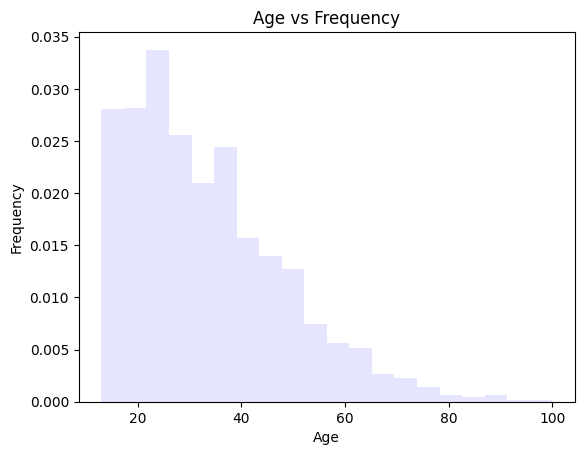

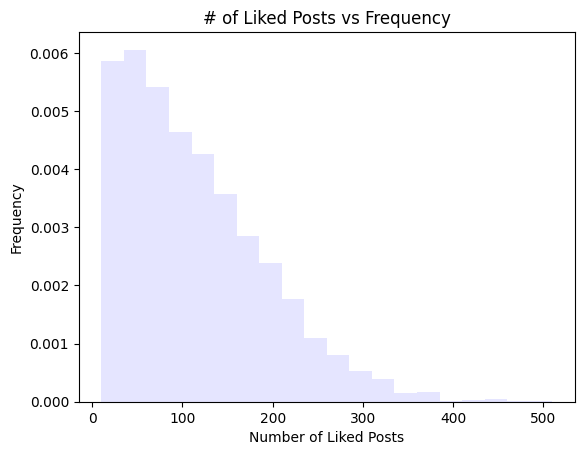

In [ ]:

from scipy.stats import skewnorm
import matplotlib.pyplot as plt
from faker import Faker
import numpy as np
import pandas as pd

fake = Faker()
Faker.seed(1)

#hist1 for age
numValues = 5000
maxValue = 87
skewness = 100

random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)

random = random - min(random)
random = random / max(random)
random = random * maxValue

age = [round(x) + 13 for x in list(random)]

plt.hist(age, 20, density=True, color = 'blue',alpha = 0.1) #label axis
plt.title('Age vs Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#hist2 for posts

numValues = 5000
maxValue = 500
skewness = 5000

random = skewnorm.rvs(a=skewness, loc=maxValue, size = numValues)

random = random - min(random)
random = random / max(random)
random = random * maxValue

posts = [round(x) + 10 for x in list(random)]

plt.hist(posts, 20, density=True, color = 'blue', alpha = 0.1) #label axis
plt.title('# of Liked Posts vs Frequency')
plt.xlabel('Number of Liked Posts')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import OrderedDict
Faker.seed(1)

sports = ['sports_football', 'sports_soccer', 'sports_baseball', 'sports_hockey', 'sports_lacrosse', 'sports_basketball']
food = ['food_indian', 'food_mexican', 'food_chinese', 'food_thai', 'food_italian', 'food_american']
fashion = ['fashion_athletic', 'fashion_casual', 'fashion_formal', 'fashion_accessories']

pet = OrderedDict([("pet_cat", 0.35), ("pet_dog", 0.55), ("pet_fish", 0.1), ("pet_guineapig", 0.05), ("pet_other", 0.05)])

items = {"Sports": sports, "Fashion" : fashion, "Food": food, "Pets": pet}

fake_data = {}

for tots in range(len(posts)):
    username = fake.user_name()

    ages = age[tots]

    q = fake.random_choices([[0.33,0.34,0.33], [0.9,0.1], [0.5,0.1,0.2,0.1], [0.1, 0.7, 0.1, 0.1],
                         [0.4,0.4,0.2], [0.5,0.5], [0.25,0.25,0.25,0.25], [0.6, 0.2, 0.2]])[0]

    w = fake.random_elements(list(items.values()), unique=True, length=len(q))

    post_total = posts[tots]

    post_dict = {}
    for item in range(len(q)):
        y = fake.random_choices([[0.33,0.34,0.33], [0.9,0.1], [0.5,0.1,0.2,0.1], [0.1, 0.7, 0.1, 0.1],
                         [0.4,0.4,0.2], [0.5,0.5], [0.25,0.25,0.25,0.25], [0.6, 0.2, 0.2]])[0]
        e = [x*q[item] for x in y]
        random_in_category = fake.random_elements(w[item], unique=True, length=len(y))

        posts_totals = [round(x*post_total) for x in e]
        for j in range(len(random_in_category)):
            post_dict[random_in_category[j]] = posts_totals[j]

    post_dict['age'] = ages

    fake_data[username] = post_dict

df = pd.DataFrame.from_dict(fake_data, orient="index")
df = df.fillna(0)


df["sports"] = df[ [ c for c in df.columns if "sports" in c ] ].sum( axis = 1 )
df["fashion"] = df[ [ c for c in df.columns if "fashion" in c ] ].sum( axis = 1 )
df["food"] = df[ [ c for c in df.columns if "food" in c ] ].sum( axis = 1 )
df["pet"] = df[ [ c for c in df.columns if "pet" in c ] ].sum( axis = 1 )

aging = df['age']
#df = df.drop(['age'], axis=1)
df['Top Likes'] = df.idxmax(axis=1)
df['Top Likes'] = [x.split("_")[0] for x in df['Top Likes']]
df['age'] = aging
df['age_group'] = pd.cut(df["age"],bins=[13, 18, 25, 60, 100],labels=["Teenager", "Young Adult", "Adult", "Senior"])
df['Total Likes'] = df[["sports", "fashion", "food", "pet"]].sum(axis=1)
df

,pet_dog,pet_cat,pet_other,pet_guineapig,fashion_athletic,fashion_formal,food_american,food_mexican,food_thai,food_chinese,...,pet_fish,sports_baseball,sports_football,sports,fashion,food,pet,Top Likes,age_group,Total Likes
ashleypham,7.0,50.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,0.0,0.0,0.0,13.0,14.0,28.0,71.0,pet,Teenager,126.0
twilliams,13.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,13.0,...,13.0,0.0,0.0,0.0,0.0,63.0,64.0,pet,Adult,127.0
shelleygutierrez,0.0,3.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,5.0,...,0.0,1.0,0.0,3.0,4.0,26.0,3.0,food,Young Adult,36.0
xjackson,31.0,3.0,0.0,0.0,7.0,0.0,0.0,12.0,0.0,11.0,...,0.0,3.0,0.0,30.0,35.0,34.0,34.0,age,Senior,133.0
caroline45,18.0,0.0,0.0,2.0,25.0,25.0,7.0,0.0,0.0,7.0,...,0.0,28.0,4.0,40.0,100.0,21.0,20.0,fashion,Adult,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mwilliams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,112.0,112.0,0.0,0.0,sports,Adult,224.0
margaretmason,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,36.0,36.0,0.0,0.0,sports,Teenager,72.0
kathleen93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,5.0,46.0,0.0,0.0,fashion,Adult,51.0
williamschad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,30.0,30.0,0.0,0.0,age,Adult,60.0


In [ ]:
Top_Likes = df.groupby("Top Likes").count()[['pet_dog']]
Top_Likes.columns = ["Most Liked Category"]
Top_Likes = Top_Likes.sort_values(by='Most Liked Category', ascending=False)
Top_Likes

,Most Liked Category
Top Likes,
age,1738
sports,930
fashion,818
food,706
pet,668


In [ ]:

import plotly.express as px

fig = px.scatter(df.reset_index(), x="Total Likes", y="age", hover_data=df.columns[:-2], hover_name="index", title="User Likes vs Age")
fig.show()

#:-2

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df2 = df.drop(['age', 'age_group', 'Top Likes', 'sports', 'fashion', 'food', 'pet'], axis = 1)
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)
pca = PCA(n_components=22)
components = pca.fit_transform(df3)

fig = px.scatter(components, x=0, y=1, color=df['Top Likes'],
                title="Fake Users Likes by Principal Coordinates")

fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Most Liked Category",
    font=dict(
        size=18
    )
)
fig.show()

Text(0, 0.5, 'Within clusters sum of squares (WCSS)')

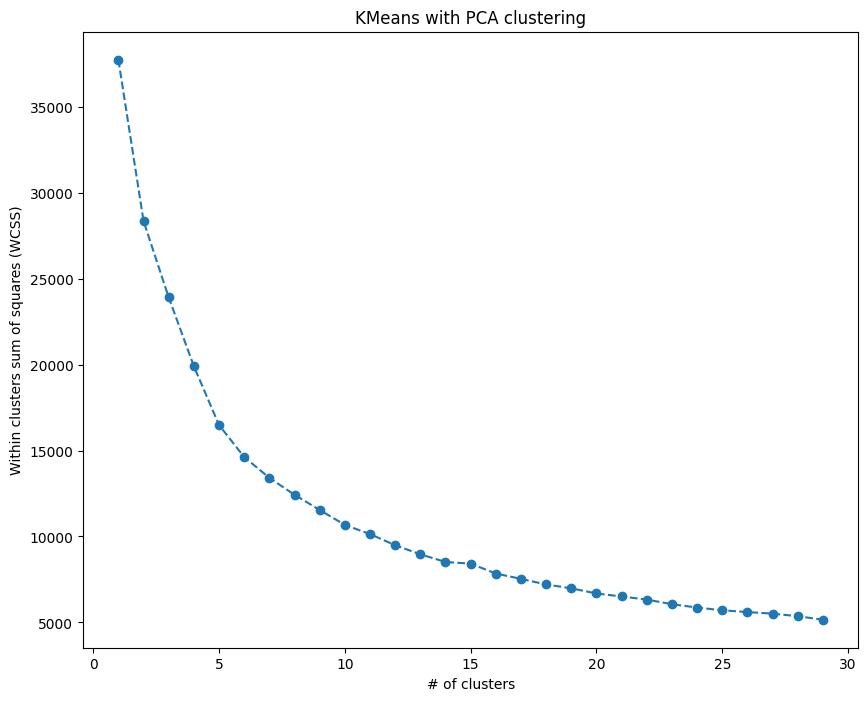

In [ ]:
pca = PCA(n_components=4)
df_normalized = (df2 - df2.mean()) / df2.std()
components = pca.fit_transform(df_normalized)
scores = pca.transform(df_normalized)

wcss = []
for i in range(1,30):
    kmeans_pca = KMeans(n_clusters=i, init = "k-means++", random_state=1)
    kmeans_pca.fit(scores)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,30), wcss, marker = "o", linestyle = "--")
plt.title("KMeans with PCA clustering")
plt.xlabel("# of clusters")
plt.ylabel("Within clusters sum of squares (WCSS)")

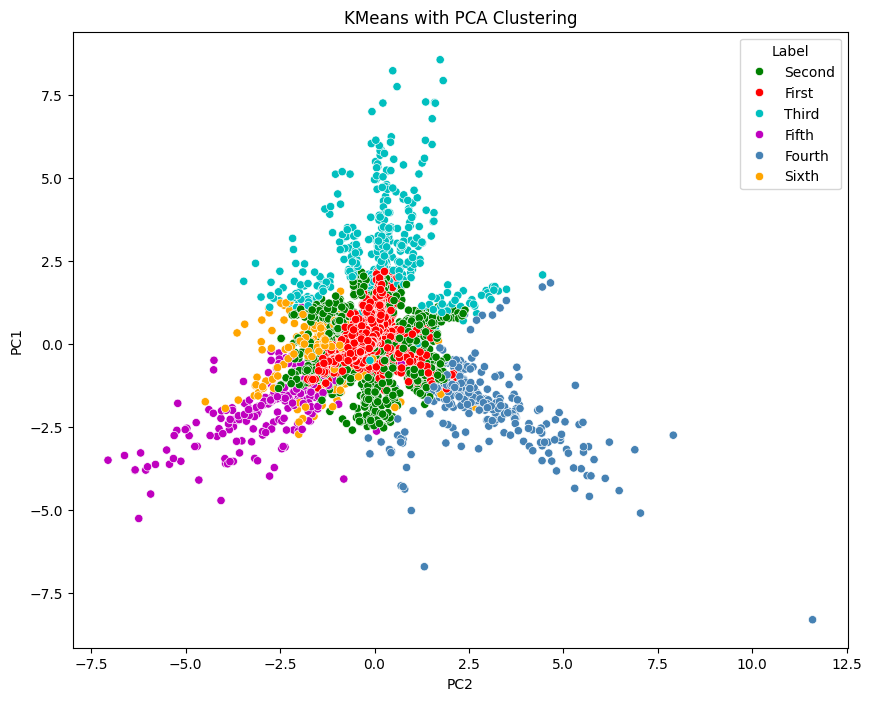

In [ ]:
kmeans_pca = KMeans(n_clusters=6, init = "k-means++", random_state=1)
kmeans_pca.fit(scores)

dfk = pd.concat([df_normalized.reset_index(drop=True),pd.DataFrame(scores)], axis=1)
dfk.columns.values[-3:] = ['PC1', "PC2", "PC3"]
dfk['Segment'] = kmeans_pca.labels_
dfk['Label'] = dfk['Segment'].map({0:"First", 1:"Second",2:"Third",
                                  3:"Fourth",4:"Fifth",5:"Sixth"})


plt.figure(figsize=(10,8))
xax = dfk['PC3']
yax = dfk['PC2']

import seaborn as sns
sns.scatterplot(x="PC2",y="PC1", hue='Label', data = dfk, palette=['g','r', 'c', 'm', 'steelblue', 'orange'])
plt.title("KMeans with PCA Clustering")
#plt.xlabel("# of Clusters")
#plt.ylabel("WCSS")
plt.show()


In [ ]:

dfk = dfk[['PC1', "PC2", "PC3", "Label", "Segment"]]
df = df.reset_index()
df = df.merge(dfk, left_index=True, right_index=True)
print(df.columns)

Index(['index', 'pet_dog', 'pet_cat', 'pet_other', 'pet_guineapig',
       'fashion_athletic', 'fashion_formal', 'food_american', 'food_mexican',
       'food_thai', 'food_chinese', 'sports_hockey', 'sports_basketball',
       'sports_soccer', 'sports_lacrosse', 'age', 'food_italian',
       'food_indian', 'fashion_accessories', 'fashion_casual', 'pet_fish',
       'sports_baseball', 'sports_football', 'sports', 'fashion', 'food',
       'pet', 'Top Likes', 'age_group', 'Total Likes', 'PC1', 'PC2', 'PC3',
       'Label', 'Segment'],
      dtype='object')


In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.7 MB/s eta 0:00:00


In [ ]:

df = df.drop(['pet_dog', 'pet_cat', 'pet_other', 'pet_guineapig', 'fashion_athletic',
       'fashion_formal', 'food_american', 'food_mexican', 'food_thai',
       'food_chinese', 'sports_hockey', 'sports_basketball', 'sports_soccer',
       'sports_lacrosse', 'food_italian', 'food_indian',
       'fashion_accessories', 'fashion_casual', 'pet_fish', 'sports_baseball',
       'sports_football','PC1', 'PC2', 'PC3', 'Label'],axis=1)
df

,index,age,sports,fashion,food,pet,Top Likes,age_group,Total Likes,Segment
0,ashleypham,14,13.0,14.0,28.0,71.0,pet,Teenager,126.0,1
1,twilliams,28,0.0,0.0,63.0,64.0,pet,Adult,127.0,1
2,shelleygutierrez,25,3.0,4.0,26.0,3.0,food,Young Adult,36.0,0
3,xjackson,64,30.0,35.0,34.0,34.0,age,Senior,133.0,1
4,caroline45,37,40.0,100.0,21.0,20.0,fashion,Adult,181.0,2
...,...,...,...,...,...,...,...,...,...,...
4855,mwilliams,55,112.0,112.0,0.0,0.0,sports,Adult,224.0,2
4856,margaretmason,14,36.0,36.0,0.0,0.0,sports,Teenager,72.0,0
4857,kathleen93,35,5.0,46.0,0.0,0.0,fashion,Adult,51.0,0
4858,williamschad,42,30.0,30.0,0.0,0.0,age,Adult,60.0,0


In [ ]:

df1 = df[df['Segment']==0]


df1.describe()


,age,sports,fashion,food,pet,Total Likes,Segment
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.0
mean,34.014487,12.451159,12.698262,13.334023,12.340232,50.823675,0.0
std,15.085711,13.817147,13.985959,14.804306,13.353024,24.750037,0.0
min,13.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0
25%,22.000000,2.000000,2.000000,2.000000,2.000000,30.000000,0.0
50%,31.000000,8.000000,8.000000,8.000000,8.000000,50.000000,0.0
75%,43.000000,18.000000,19.000000,19.000000,18.000000,72.000000,0.0
max,97.000000,83.000000,80.000000,80.000000,80.000000,104.000000,0.0


In [ ]:
df2 = df[df['Segment']==1]


df2.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.0
mean,33.306656,38.322504,34.477813,32.352615,35.556260,140.709192,1.0
std,14.655936,24.806911,23.520165,23.468137,24.068359,38.413030,0.0
min,13.000000,0.000000,0.000000,0.000000,0.000000,86.000000,1.0
25%,22.000000,22.000000,13.000000,11.000000,15.000000,112.000000,1.0
50%,30.000000,38.000000,35.500000,33.000000,36.000000,131.000000,1.0
75%,42.000000,57.000000,53.000000,51.000000,55.000000,158.000000,1.0
max,100.000000,114.000000,84.000000,83.000000,84.000000,310.000000,1.0


In [ ]:

df3 = df[df['Segment']==2]


df3.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.0
mean,31.792405,27.698734,120.468354,36.187342,26.736709,211.091139,2.0
std,14.397456,34.379679,43.785540,38.608609,34.034195,62.984301,0.0
min,13.000000,0.000000,70.000000,0.000000,0.000000,91.000000,2.0
25%,20.000000,0.000000,90.000000,0.000000,0.000000,160.000000,2.0
50%,29.000000,16.000000,107.000000,20.000000,15.000000,200.000000,2.0
75%,41.000000,39.000000,137.000000,73.500000,39.000000,252.500000,2.0
max,90.000000,147.000000,310.000000,168.000000,156.000000,418.000000,2.0


In [ ]:
df4 = df[df['Segment']==3]


df4.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0
mean,32.686620,22.897887,20.612676,21.461268,131.654930,196.626761,3.0
std,14.477607,30.517679,24.525129,26.857205,49.305286,68.796017,0.0
min,14.000000,0.000000,0.000000,0.000000,69.000000,84.000000,3.0
25%,21.000000,0.000000,0.000000,0.000000,96.000000,148.000000,3.0
50%,30.000000,16.000000,16.000000,16.000000,118.500000,186.500000,3.0
75%,42.000000,29.250000,29.250000,29.000000,150.500000,232.000000,3.0
max,92.000000,200.000000,160.000000,163.000000,459.000000,510.000000,3.0


In [ ]:
df5 = df[df['Segment']==4]


df5.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0
mean,33.792793,148.594595,18.509009,19.369369,20.635135,207.108108,4.0
std,15.129377,51.823033,19.300609,23.172354,20.730707,67.211270,0.0
min,13.000000,88.000000,0.000000,0.000000,0.000000,97.000000,4.0
25%,22.000000,110.000000,0.000000,0.000000,0.000000,160.000000,4.0
50%,30.000000,133.000000,17.000000,16.000000,18.500000,193.000000,4.0
75%,43.000000,174.500000,31.750000,27.000000,30.000000,247.750000,4.0
max,91.000000,372.000000,118.000000,152.000000,135.000000,445.000000,4.0


In [ ]:
df6 = df[df['Segment']==5]


df6.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0
mean,33.633452,25.818505,16.633452,132.377224,20.704626,195.533808,5.0
std,15.002053,30.574017,17.880081,48.656156,22.919150,62.288039,0.0
min,14.000000,0.000000,0.000000,78.000000,0.000000,91.000000,5.0
25%,21.000000,0.000000,0.000000,97.000000,0.000000,153.000000,5.0
50%,31.000000,18.000000,14.000000,120.000000,17.000000,187.000000,5.0
75%,43.000000,32.000000,27.000000,148.000000,29.000000,233.000000,5.0
max,95.000000,140.000000,92.000000,333.000000,148.000000,477.000000,5.0


In [ ]:
Top_Likes = df.groupby(["age_group","Top Likes"]).count()['fashion']
Top_Likes.columns = ["Most Liked Category"]
Top_Likes


/tmp/ipython-input-18-3681715496.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age_group    Top Likes
Teenager     age            98
             fashion       187
             food          137
             pet           141
             sports        171
Young Adult  age           220
             fashion       187
             food          178
             pet           156
             sports        280
Adult        age          1220
             fashion       415
             food          367
             pet           352
             sports        451
Senior       age           198
             fashion        25
             food           23
             pet            15
             sports         25
Name: fashion, dtype: int64